<a href="https://colab.research.google.com/github/zoed98/Python-Machine-Learning/blob/main/15_18IrisElbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import math
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from sklearn.datasets import load_iris


In [19]:
iris = load_iris()
X = iris

In [20]:
x = scale(iris.data)

In [21]:
clustering = KMeans(n_clusters =3,random_state=1)

In [22]:
clustering.fit(x)

KMeans(n_clusters=3, random_state=1)

In [23]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
iris_df = pd.DataFrame(iris.data)

In [25]:
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']

In [26]:
y=pd.DataFrame(iris.target)
y.columns=['targets']
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


In [27]:
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [28]:
iris_df.head()
X = iris_df.loc[:,['petal_length','petal_width']]

In [29]:
distortions = []
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2992242581050885,
 0.26508349289751987,
 0.23403203371788028,
 0.21844114552287228,
 0.196175058093858,
 0.1842857252575511,
 0.1718520330268836,
 0.16584349985300983,
 0.15668478493812218,
 0.15026296196394276,
 0.1427170313047856,
 0.1370727114089804,
 0.13134561980004583,
 0.12625805733055154]

range(1, 18)
0.12625805733055154


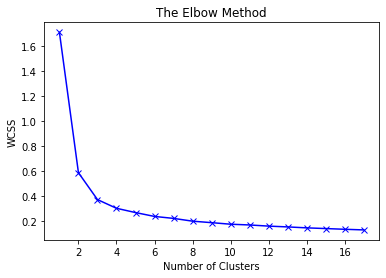

In [30]:
print(K)

print(np.min(distortions))

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.plot(K,distortions,'bx-')
plt.show()